# Customer Segmentation using RFM Clustering

In [168]:
# Import key Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load data from Local Repository
retail = pd.read_excel('Online Retail.xlsx')

In [173]:
retail.shape

(541909, 8)

In [174]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df = pd. DataFrame

In [170]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [171]:
# View of NA rows across different features
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [172]:
# If we dropped any rows with NA, how many rows would we have left?
retail.dropna().shape

(406829, 8)

In [23]:
# Display object key information including Count, Unique values, Top value and frequency
retail.describe(include=['object'])

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [24]:
# Display statistics for numeric features including Count, Mean, Standard Deviation, Min, Max, etc...
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [25]:
# Number of records with negative quantity
retail.Quantity[retail.Quantity < 0 ].count()

10624

In [26]:
# Quick inspection of top records with Negative Quantity
retail.loc[retail.Quantity < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [27]:
# Number of records with negative Unit Price 
retail.UnitPrice[retail.UnitPrice < 0].count()

2

In [28]:
# Quick exploration of negative price records
retail.loc[retail.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


# 2.3.1 Construct New features

# 1. Invoice

In [29]:
# Breaking down Invoice Number into Code and Number
retail['InvoiceNumber'] = retail.InvoiceNo.astype(str).str[-6:]
retail['InvoiceCode'] = retail.InvoiceNo.astype(str).str[-7:-6]

# 2. Dates

In [30]:
# Transforming InvoiceDate column to datetime type and mapping to a new columne as InvoiceDateTime
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [31]:
# Construct Year, Month and YearMonth from Invoice Date field
retail['Year'], retail['Month'] = retail['InvoiceDate'].dt.year, retail['InvoiceDate'].dt.month
retail['YearMonth'] = retail['InvoiceDate'].map(lambda x: 100*x.year + x.month)

In [32]:
# Create "Date" column in datetime format to use for index
retail['Date'] = pd.to_datetime(retail.InvoiceDate.dt.date)
retail.set_index('Date', inplace=True)

In [33]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 to 2011-12-09
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      541909 non-null  object        
 1   StockCode      541909 non-null  object        
 2   Description    540455 non-null  object        
 3   Quantity       541909 non-null  int64         
 4   InvoiceDate    541909 non-null  datetime64[ns]
 5   UnitPrice      541909 non-null  float64       
 6   CustomerID     406829 non-null  float64       
 7   Country        541909 non-null  object        
 8   InvoiceNumber  541909 non-null  object        
 9   InvoiceCode    541909 non-null  object        
 10  Year           541909 non-null  int64         
 11  Month          541909 non-null  int64         
 12  YearMonth      541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 57.9+ MB


In [34]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth
Date,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,,2010,12,201012


# Processing and EDA on new features

# InvoiceNo processing

In [36]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth
Date,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,,2010,12,201012


In [37]:
# Inspecting new features
retail.describe(include='object')

,InvoiceNo,StockCode,Description,Country,InvoiceNumber,InvoiceCode
count,541909,541909,540455,541909,541909,541909
unique,25900,4070,4223,38,25900,3
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,573585,
freq,1114,2313,2369,495478,1114,532618


In [38]:
# Counting types of Invoices
retail.InvoiceCode.value_counts()

     532618
C      9288
A         3
Name: InvoiceCode, dtype: int64

In [39]:
# Unique values
retail.InvoiceCode.unique()

array(['', 'C', 'A'], dtype=object)

In [40]:
# Replacing '' with 'N', to reflect Normal transactions
retail.InvoiceCode.replace({'': 'N'}, inplace = True)
retail.InvoiceCode.unique()

array(['N', 'C', 'A'], dtype=object)

In [41]:
# Inspecting type A and C invoices
retail[retail.InvoiceCode == "A"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth
Date,,,,,,,,,,,,,
2011-08-12,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,563185,A,2011,8,201108
2011-08-12,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,563186,A,2011,8,201108
2011-08-12,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,563187,A,2011,8,201108


In [42]:
retail[retail.InvoiceCode == "C"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth
Date,,,,,,,,,,,,,
2010-12-01,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,536379,C,2010,12,201012
2010-12-01,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,536383,C,2010,12,201012
2010-12-01,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,536391,C,2010,12,201012
2010-12-01,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,536391,C,2010,12,201012
2010-12-01,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,536391,C,2010,12,201012


# InvoiceNo Validations

From initial review of the invoice numbers and code, it seems that for a specific Invoice Number, there's only a certail type available in the dataset. e.g. For Invoice type-C transactions verify if there is the corresponding N-type transaction. i.e same Invoice Number, different type.

In [43]:
retail[retail.InvoiceNumber == '536548']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth
Date,,,,,,,,,,,,,
2010-12-01,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,2010-12-01 14:33:00,1.95,12472.0,Germany,536548,C,2010,12,201012
2010-12-01,C536548,22242,5 HOOK HANGER MAGIC TOADSTOOL,-5,2010-12-01 14:33:00,1.65,12472.0,Germany,536548,C,2010,12,201012
2010-12-01,C536548,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1,2010-12-01 14:33:00,2.95,12472.0,Germany,536548,C,2010,12,201012
2010-12-01,C536548,22892,SET OF SALT AND PEPPER TOADSTOOLS,-7,2010-12-01 14:33:00,1.25,12472.0,Germany,536548,C,2010,12,201012
2010-12-01,C536548,22654,DELUXE SEWING KIT,-1,2010-12-01 14:33:00,5.95,12472.0,Germany,536548,C,2010,12,201012
2010-12-01,C536548,22767,TRIPLE PHOTO FRAME CORNICE,-2,2010-12-01 14:33:00,9.95,12472.0,Germany,536548,C,2010,12,201012
2010-12-01,C536548,22333,RETROSPOT PARTY BAG + STICKER SET,-1,2010-12-01 14:33:00,1.65,12472.0,Germany,536548,C,2010,12,201012
2010-12-01,C536548,22245,"HOOK, 1 HANGER ,MAGIC GARDEN",-2,2010-12-01 14:33:00,0.85,12472.0,Germany,536548,C,2010,12,201012
2010-12-01,C536548,22077,6 RIBBONS RUSTIC CHARM,-6,2010-12-01 14:33:00,1.65,12472.0,Germany,536548,C,2010,12,201012


In [44]:
# Get list of Invoice Numbers with C
invoice_numbers = list(retail[retail.InvoiceCode == "C"].InvoiceNumber)

In [45]:
# Create group list to iterate through
groups = retail.groupby('InvoiceNumber')

In [46]:
contained_n_and_c = []

In [62]:
# For each group iterate through Invoice numbers:
# IF there's any invoice type N, then append and continue
for group in groups:
    
    group_id = group[0]
    data = group[1]
    
    if group_id in invoice_numbers:
        row_data = [row[-1] for row in data.values]
        if 'N' in row_data:
            contained_n_and_c.append(group_id)
        else:
            pass
    else:
        pass

# Test there's no overlap between type-C and type-N transactions in a single invoice contained_n_and_c

In [48]:
[]

[]

# Active Population

Now that new features are in place and based on the initial data review summary, we need to derive an active population for our modelling stage:

1. A tree based rule set has been defined using the features from the dataset
2. Each feature has one or more rules that define its active population
3. Rules are represented by different masks


# Masks for Data Processing

Creating various Masks to implement the rules per feature for narrowing down the active population

In [49]:
# Valid Price
valid_price = retail.UnitPrice >= 0

# Valid Description
valid_desc = retail.Description.notnull()

# Valid CID
valid_CID = retail.CustomerID.notnull()

# Invoice type-N (Normal)
inv_N = retail.InvoiceCode == "N"

# Invoice type-C (Cancellation)
inv_C = retail.InvoiceCode == "C"

# Invoice type-N (Amendment)
inv_A = retail.InvoiceCode == "A"

# Quantity Negative
q_neg = retail.Quantity < 0 

# Quantity Positive
q_pos = retail.Quantity >= 0 

In [50]:
# Create a Masks Summary Dataframe to store and view the different count across masks
df_mask = pd.DataFrame(retail.columns)
df_mask.columns = ['Features']

df_mask['Valid Prices'] = retail[valid_price].count().values
df_mask['Valid Description'] = retail[valid_desc].count().values
df_mask['Valid Customer IDs'] = retail[valid_CID].count().values
df_mask['Invoice Normal'] = retail[inv_N].count().values
df_mask['Invoice Cancellation'] = retail[inv_C].count().values
df_mask['Invoice Adjustment'] = retail[inv_A].count().values
df_mask['Negative Quantities'] = retail[q_neg].count().values
df_mask['Positive Quantities'] = retail[q_pos].count().values


In [51]:
df_mask

,Features,Valid Prices,Valid Description,Valid Customer IDs,Invoice Normal,Invoice Cancellation,Invoice Adjustment,Negative Quantities,Positive Quantities
0,InvoiceNo,541907,540455,406829,532618,9288,3,10624,531285
1,StockCode,541907,540455,406829,532618,9288,3,10624,531285
2,Description,540453,540455,406829,531164,9288,3,9762,530693
3,Quantity,541907,540455,406829,532618,9288,3,10624,531285
4,InvoiceDate,541907,540455,406829,532618,9288,3,10624,531285
5,UnitPrice,541907,540455,406829,532618,9288,3,10624,531285
6,CustomerID,406829,406829,406829,397924,8905,0,8905,397924
7,Country,541907,540455,406829,532618,9288,3,10624,531285
8,InvoiceNumber,541907,540455,406829,532618,9288,3,10624,531285
9,InvoiceCode,541907,540455,406829,532618,9288,3,10624,531285


# Active Population - Paths to Nodes

In [52]:
# Path1 - Filter population down to include all 
# valid Customer IDs with Valid Price and Description
p1 = valid_price & valid_desc & valid_CID

In [53]:
# Path1 - Filter population down to include all 
# valid Customer IDs with Valid Price and Description
p1 = valid_price & valid_desc & valid_CID

# Path2 - Filter population down to include all 
# Normal (type-N) transactions with Positive Quantities
p2 = inv_N & q_pos

# Path3 - Filter population down to include all 
# Cancel (type-C) or Adjust (type-A) transactions 
# with Negative Quanitities
p3 = (inv_A | inv_C) & q_neg

# Path to Leafs: Combine Paths 1, 2 and 3:
# *************** CREATE A COPY ************
retail_pp = retail.loc[p1 & (p2 | p3)].copy()

# Inspect new pre-processed and clean dataset
retail_pp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth
Date,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,N,2010,12,201012
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,N,2010,12,201012
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012


In [54]:
retail_pp.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,YearMonth
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,2010.934002,7.605947,201101.006123
std,248.693370,69.315162,1713.600303,0.248279,3.418942,23.877089
min,-80995.000000,0.000000,12346.000000,2010.000000,1.000000,201012.000000
25%,2.000000,1.250000,13953.000000,2011.000000,5.000000,201104.000000
50%,5.000000,1.950000,15152.000000,2011.000000,8.000000,201107.000000
75%,12.000000,3.750000,16791.000000,2011.000000,11.000000,201110.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,201112.000000


In [55]:
retail_pp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 406829 entries, 2010-12-01 to 2011-12-09
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      406829 non-null  object        
 1   StockCode      406829 non-null  object        
 2   Description    406829 non-null  object        
 3   Quantity       406829 non-null  int64         
 4   InvoiceDate    406829 non-null  datetime64[ns]
 5   UnitPrice      406829 non-null  float64       
 6   CustomerID     406829 non-null  float64       
 7   Country        406829 non-null  object        
 8   InvoiceNumber  406829 non-null  object        
 9   InvoiceCode    406829 non-null  object        
 10  Year           406829 non-null  int64         
 11  Month          406829 non-null  int64         
 12  YearMonth      406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 43.5+ MB


# Customer ID Venn diagramms

In [56]:
#from matplotlib_venn import venn2, venn3
#venn2(subsets = (406829,135080,0), set_labels = ('Valid CIDs', 'Empty CIDs', 'Total'));

In [57]:
#venn3(subsets=(1, 1, 0, 3, 0, 0, 0), set_labels = ('A', 'B', 'C'));

# Data Inspection and visualisations

In [58]:
# Increase default figure and font sizes for easier viewing.
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

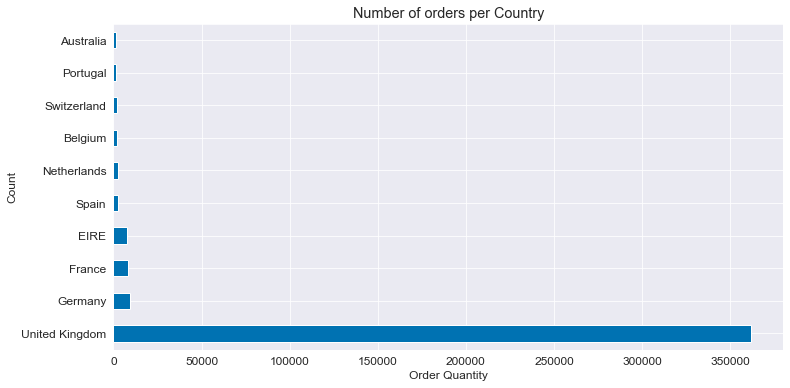

In [59]:
# Review which countries do the orders come from
retail_pp.Country.value_counts()[0:10].plot(kind='barh');
plt.title('Number of orders per Country')
plt.xlabel('Order Quantity');
plt.ylabel('Count');

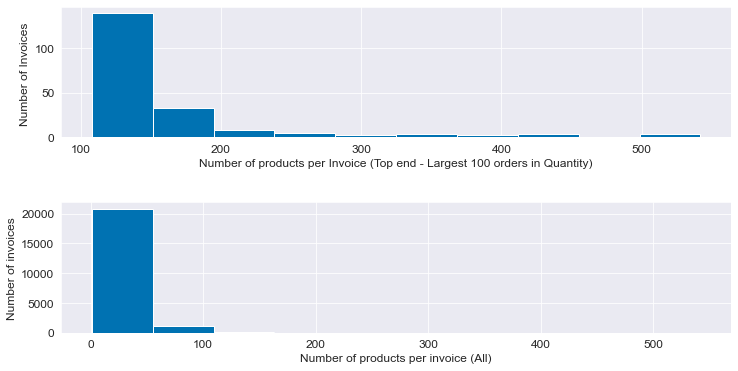

In [60]:
fig = plt.figure()

# Plotting the number of Quantities per invoice (Top end)
ax1 = fig.add_subplot(211)
retail_pp.groupby('InvoiceNo').Quantity.count().sort_values(ascending = False )[:200].plot(kind = 'hist',ax=ax1)
ax1.xaxis.set_label_text('Number of products per Invoice (Top end - Largest 100 orders in Quantity)');
ax1.yaxis.set_label_text('Number of Invoices ');

# Plotting the number of Quantities per invoice (All)
ax2 = fig.add_subplot(212)
retail_pp.groupby('InvoiceNo').Quantity.count().sort_values(ascending = False).plot(kind='hist', ax=ax2);
ax2.xaxis.set_label_text('Number of products per invoice (All)');
ax2.yaxis.set_label_text('Number of invoices');
fig.subplots_adjust(hspace=0.5)

There is a small amount of Invoices (up to 200) that contain a large amount of products ordered in a single invoice. e.g.

1. A single invoice has 1100 products
2. Another single invoice has 800 products
3. Four invoices have 700 products
4. In total, up to 200 number of invoices have more than 200 products each
5. Most of the invoices (25,000 in population) normally have up to 200 products each, with most (24000+) having up to 100 each

# Key Performance Indicators - KPIS

Before proceeding into modelling, the following categories of KPIs will be examined in more detail:

. Transaction KPIs (Revenue, Order count, Active Customers, etc...)

. Customer KPIs ( New vs Old Customers, Retention, etc...)

. Product KPIs (Top selling product, etc...)


# Transaction MONTHLY KPIs - Main method

# Monthly Revenue

Revenue =  ∑𝑀𝑜𝑛𝑡ℎ𝑈𝑛𝑖𝑡𝑃𝑟𝑖𝑐𝑒 𝑥 𝑄𝑢𝑎𝑛𝑡𝑖𝑡𝑦  (Across all active customers)

. Group by YearMonth

. Calculate Order Value for each row by multiplying Price with Quantity

. Sum Order Values grouped by YearMonth



# Monthly Revenue Growth
. Month by month percentage comparison of Revenue change


# Active Customers

. Group: by YearMonth

. Unique count of Customer IDs per grouping

# Monthly Order Count

. Group: by YearMonth
    
. Count Invoices per grouping

# Average revenue per order

. Average monthly revenue above

In order to capture the key Monthly KPIs, the main retail_pp DataFrame has been used in order to generate a new Multi-Index DataFrame by:

1. Grouping retail_pp based on Month and Year and creating an index based on these
2. Renaming the index levels to Year and Month
3. Generating and appending each new KPI on the new dataframe
4. Plotting the KPIs using Line or Graph bars as required

# Revenue per transaction

In [63]:
retail_pp['Revenue'] = retail_pp.UnitPrice * retail_pp.Quantity
retail_pp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth,Revenue
Date,,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,N,2010,12,201012,15.30
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,N,2010,12,201012,22.00
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34


# Generate Dataframe with Monthly KPIs

In [64]:
# 1. Revenue - Generate Monthly KPIs DataFrame by aggregating Revenue
m_kpis = pd.DataFrame(retail_pp.groupby([retail_pp.index.year,retail_pp.index.month])['Revenue'].sum())

# 2. Generate Monthly Growth rate based on previous months revenue
m_kpis['MonthlyGrowth'] = m_kpis['Revenue'].pct_change()

# 3. Generate Active Customers
m_kpis['ActiveCustomers'] = pd.DataFrame(retail_pp.groupby([retail_pp.index.year,retail_pp.index.month])['CustomerID'].nunique())

# 4. Generate Monthly Order Count (Quantity)
m_kpis['MonthlyOrderCount'] = pd.DataFrame(retail_pp.groupby([retail_pp.index.year,retail_pp.index.month])['Quantity'].sum())

# 5. Gengerate Monthly Order Average
m_kpis['MonthlyOrderAverage'] =  pd.DataFrame(retail_pp.groupby([retail_pp.index.year,retail_pp.index.month])['Revenue'].mean())

# Rename index to capture Year and Month
m_kpis.index.set_names(['Year', 'Month'], inplace = True)
m_kpis

Revenue  MonthlyGrowth  ActiveCustomers  MonthlyOrderCount  \
Year Month                                                                   
2010 12      554604.020            NaN              948             296362   
2011 1       475074.380      -0.143399              783             269379   
     2       436546.150      -0.081099              798             262833   
     3       579964.610       0.328530             1020             344012   
     4       426047.851      -0.265390              899             278585   
     5       648251.080       0.521545             1079             367852   
     6       608013.160      -0.062072             1051             356922   
     7       574238.481      -0.055549              993             363418   
     8       616368.000       0.073366              980             386612   
     9       931440.372       0.511176             1302             537496   
     10      974603.590       0.046340             1425             569666   
     11     1132407.740       0.161916             1711             669915   
     12      342506.380      -0.697541              686             203836   

            MonthlyOrderAverage  
Year Month                       
2010 12               20.655643  
2011 1                21.681014  
     2                21.438204  
     3                20.845540  
     4                18.365715  
     5                22.424626  
     6                21.842691  
     7                20.879881  
     8                22.282120  
     9                22.817118  
     10               19.224846  
     11               17.262839  
     12               19.393374

In [65]:
m_kpis.index

MultiIndex([(2010, 12),
            (2011,  1),
            (2011,  2),
            (2011,  3),
            (2011,  4),
            (2011,  5),
            (2011,  6),
            (2011,  7),
            (2011,  8),
            (2011,  9),
            (2011, 10),
            (2011, 11),
            (2011, 12)],
           names=['Year', 'Month'])

# Plot key monthly KPIs

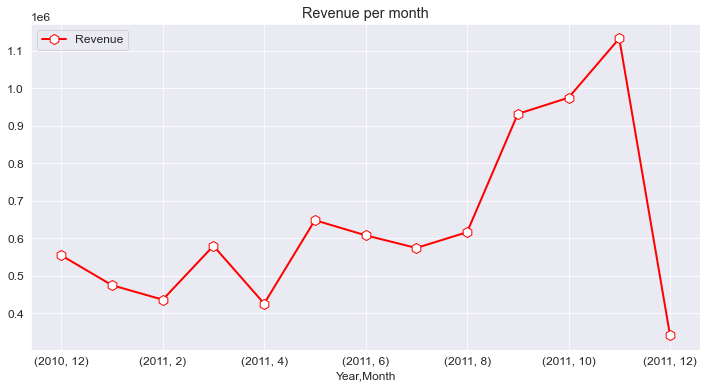

In [66]:
# Line Graph to capture the monthly revenue
m_kpis.plot.line(y='Revenue', title='Revenue per month',color = 'r',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

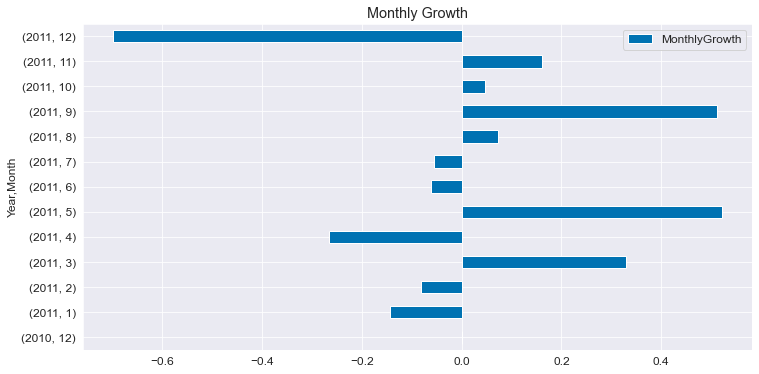

In [67]:
# Horizontal Bar Graph to capture monthly revenue growth
m_kpis.plot.barh(y='MonthlyGrowth',title='Monthly Growth', rot=0);

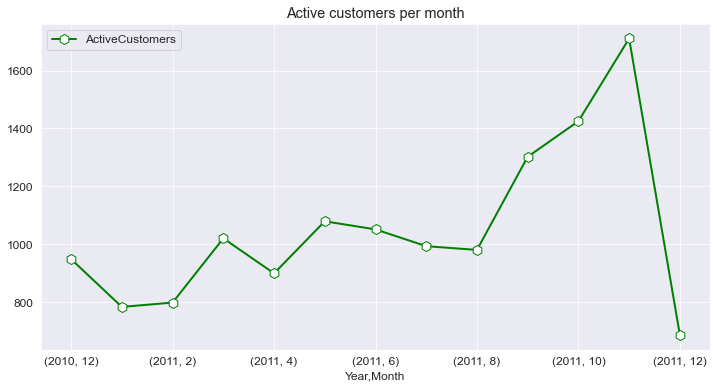

In [68]:
# Line graph to capture the active customers per month
m_kpis.plot.line(y='ActiveCustomers', title='Active customers per month',color = 'g',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

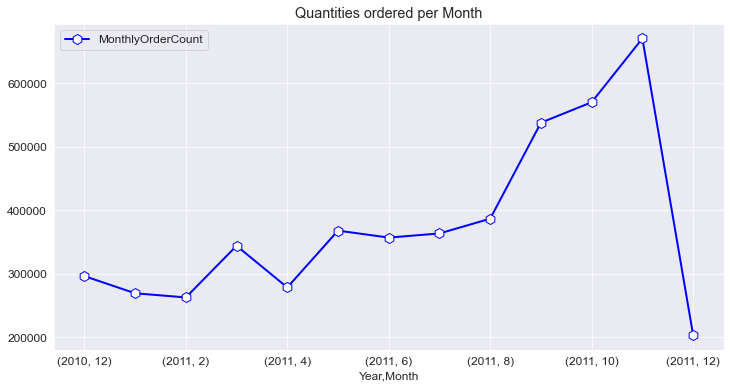

In [69]:
# Horizontal Bar graph to capture number of quantities ordered per month
m_kpis.plot.line(y='MonthlyOrderCount',title='Quantities ordered per Month',color = 'b',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

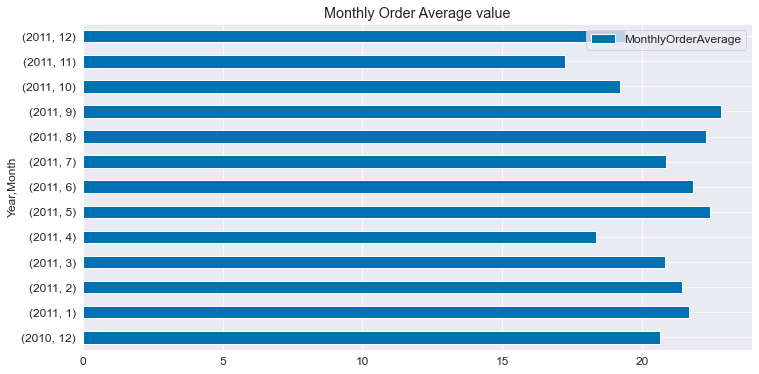

In [70]:
# Horizontal Bar graph to capture number of quantities ordered per month
m_kpis.plot.barh(y='MonthlyOrderAverage',title='Monthly Order Average value');

In [80]:
# Create Daily KPIs dataframe and calculate Daily Revenue
daily_kpis = pd.DataFrame(retail_pp.groupby(retail_pp.index)['Revenue'].sum())

# Generate Active Customers count and append to Daily KPIs
daily_kpis['ActiveCustomers'] = pd.DataFrame(retail_pp.groupby(retail_pp.index)['CustomerID'].nunique())

# Generate Order Count (Quantity) and append to Daily KPIs
daily_kpis['Quantity'] = pd.DataFrame(retail_pp.groupby(retail_pp.index)['Quantity'].sum())

# Generate Daily Average Order amount and append to Daily KPIs
daily_kpis['AverageOrderAmount'] = pd.DataFrame(retail_pp.groupby(retail_pp.index)['Revenue'].mean())

# Review KPIs
daily_kpis.head()

,Revenue,ActiveCustomers,Quantity,AverageOrderAmount
Date,,,,
2010-12-01,46051.26,98,24032,23.400030
2010-12-02,45775.43,117,20855,22.395024
2010-12-03,22598.46,55,11548,20.231388
2010-12-05,31380.60,76,16394,11.520044
2010-12-06,30465.08,90,16095,15.433171


# 3.2.1 - Monthly KPIs

In [81]:
# Create function to resample daily KPIs based on sampling frequency (M - Month, Y-Year) and aggregation method (sum, mean, count)
def resampleKPIs(d_kpi, sampling, method):
    if method == 'sum':
        m_kpi = d_kpi.resample(sampling).sum()
    elif method == 'mean':
        m_kpi = d_kpi.resample(sampling).mean()
    elif method == 'count':
        m_kpi = d_kpi.resample(sampling).count()
    return m_kpi

In [82]:
# Sampling configuration 
sampling = 'M'
method_sum = 'sum'
method_average = 'mean'
method_count = 'count'

In [83]:
# Generate Monthly KPIs data frame by sampling the Revenue from Daily KPIs data frame
monthly_kpis = pd.DataFrame(resampleKPIs(daily_kpis.Revenue,sampling, method_sum))

# Resampling the whole of Daily KPIs data frame to create Monthly KPIs based on specified aggregation method

# 1. Revenue - Aggregate function: SUM
monthly_kpis['Revenue'] = pd.DataFrame(resampleKPIs(daily_kpis.Revenue,sampling, method_sum))

# 2. Generate Monthly Growth rate based on previous months revenue
monthly_kpis['MonthlyGrowth'] = monthly_kpis['Revenue'].pct_change()

# 3. ActiveCustomers - Aggregate function: SUM 
# *****************************************************************
# (This is incorrect aggregate method as there might be a unique customer in one month and same unique customer in another month,
#  and by resampling monthly this can be double counted. This is the reason this method of resampling from daily
#  KPIs is not suitable for Monthly KPIs derivations). So we're just including that here for demonstration
# ***********************************************************
monthly_kpis['ActiveCustomers'] = pd.DataFrame(resampleKPIs(daily_kpis.ActiveCustomers,sampling, method_sum))

# 4. Monthly Order Count (Quantity) - Aggregate function: SUM 
monthly_kpis['MonthlyOrderCount'] = pd.DataFrame(resampleKPIs(daily_kpis.Quantity,sampling, method_sum))


# 5. Gengerate Monthly Average - Aggregate function: MEAN
monthly_kpis['AverageMonthlyOrder'] = pd.DataFrame(resampleKPIs(daily_kpis.AverageOrderAmount,sampling, method_average))
monthly_kpis

,Revenue,MonthlyGrowth,ActiveCustomers,MonthlyOrderCount,AverageMonthlyOrder
Date,,,,,
2010-12-31,554604.020,NaN,1403,296362,21.709703
2011-01-31,475074.380,-0.143399,1116,269379,21.831155
2011-02-28,436546.150,-0.081099,1080,262833,21.169192
2011-03-31,579964.610,0.328530,1434,344012,20.631659
2011-04-30,426047.851,-0.265390,1217,278585,18.359635
2011-05-31,648251.080,0.521545,1559,367852,22.009316
2011-06-30,608013.160,-0.062072,1481,356922,21.841281
2011-07-31,574238.481,-0.055549,1384,363418,20.402464
2011-08-31,616368.000,0.073366,1397,386612,21.278471


In [84]:
m_kpis.index.levels[1][:]

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

# 3.2.2 - Plotting Monthly KPIs based on sampling Daily KPIs

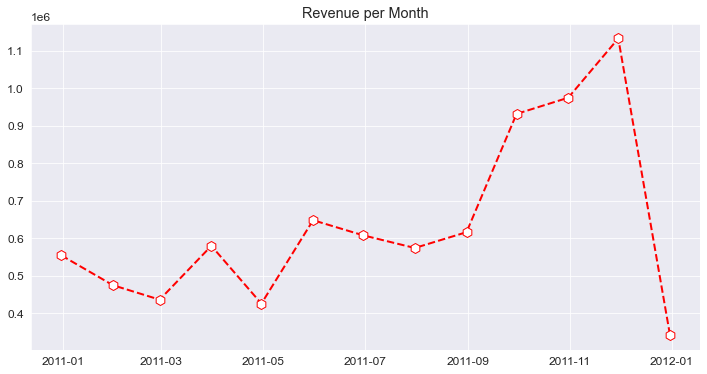

In [85]:
# Plot Monthly revenue
plt.title("Revenue per Month")
plt.plot(monthly_kpis.index, monthly_kpis['Revenue'],'--r', 
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

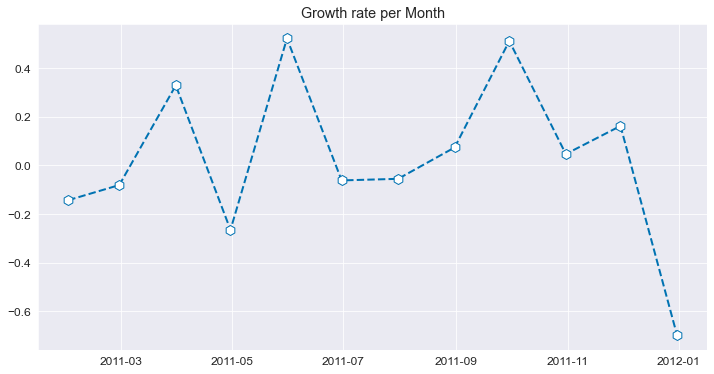

In [86]:
# Plot Monthly Growth rate
plt.title("Growth rate per Month")
plt.plot(monthly_kpis.index, monthly_kpis['MonthlyGrowth'],'--o', 
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

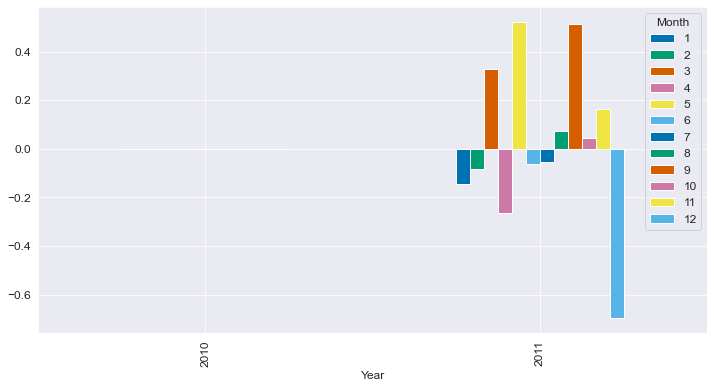

In [87]:
m_kpis['MonthlyGrowth'].unstack().plot(kind='bar')

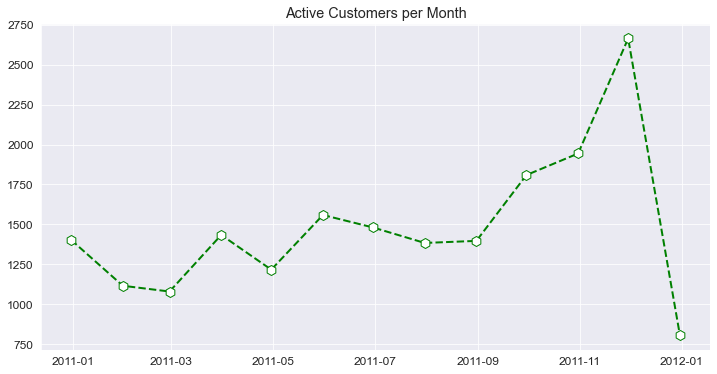

In [88]:
# Plot Monthly Active Customers 
plt.title("Active Customers per Month")
plt.plot(monthly_kpis.index, monthly_kpis['ActiveCustomers'],'--g', 
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

# 3.3 Transaction MONTHLY KPIs - Alternative Method 2 (NOT USED, just for DEMO)

This was the original implementation based on the based on YearMonth direct aggregation, using the YearMonth feature created at the beggining. THe main implementation at 2.4.1 is more elegant as it allows using the date directly from the index without the need to create a new feature.

Retaining this implementation here for the record and for comparison and validation purposes.

In [90]:
MonthlyKPIs = retail_pp.groupby(['YearMonth']).Revenue.sum().reset_index()
MonthlyKPIs

,YearMonth,Revenue
0,201012,554604.020
1,201101,475074.380
2,201102,436546.150
3,201103,579964.610
4,201104,426047.851
5,201105,648251.080
6,201106,608013.160
7,201107,574238.481
8,201108,616368.000
9,201109,931440.372


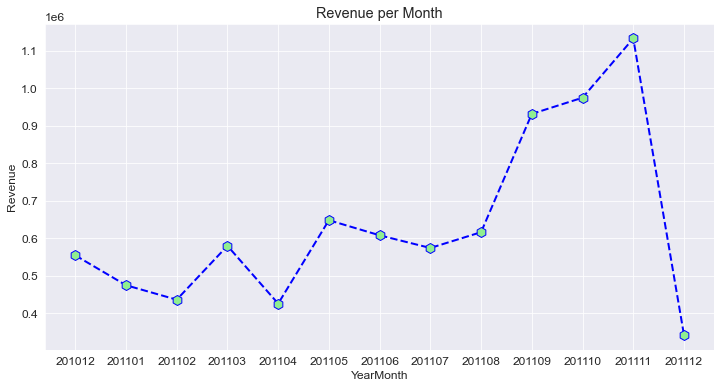

In [91]:
x = [a for a in range(len(MonthlyKPIs.YearMonth))]

plt.xlabel("YearMonth")
plt.ylabel("Revenue")
plt.title("Revenue per Month")
plt.plot(x, MonthlyKPIs.Revenue,'--b', 
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='lightgreen')

plt.xticks(x, MonthlyKPIs.YearMonth)
plt.show()

# Monthly Growth Rate

In [92]:

MonthlyKPIs['MonthlyGrowth'] = MonthlyKPIs['Revenue'].pct_change()
MonthlyKPIs

,YearMonth,Revenue,MonthlyGrowth
0,201012,554604.020,NaN
1,201101,475074.380,-0.143399
2,201102,436546.150,-0.081099
3,201103,579964.610,0.328530
4,201104,426047.851,-0.265390
5,201105,648251.080,0.521545
6,201106,608013.160,-0.062072
7,201107,574238.481,-0.055549
8,201108,616368.000,0.073366
9,201109,931440.372,0.511176


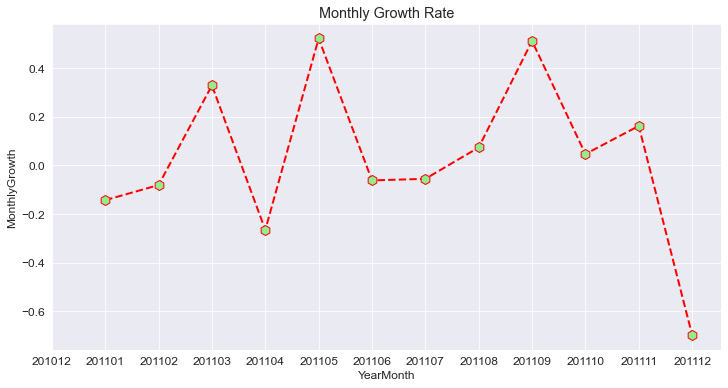

In [93]:
x1 = [a for a in range(len(MonthlyKPIs.YearMonth))]
plt.xlabel("YearMonth")
plt.ylabel("MonthlyGrowth")
plt.title("Monthly Growth Rate")
plt.plot(x1, MonthlyKPIs.MonthlyGrowth,'--r', 
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='lightgreen')

plt.xticks(x1, MonthlyKPIs.YearMonth)
plt.show()

# Active customers

In [94]:
MonthlyKPIs['ActiveCustomers'] = retail_pp.groupby('YearMonth')['CustomerID'].nunique().reset_index()['CustomerID']
MonthlyKPIs

,YearMonth,Revenue,MonthlyGrowth,ActiveCustomers
0,201012,554604.020,NaN,948
1,201101,475074.380,-0.143399,783
2,201102,436546.150,-0.081099,798
3,201103,579964.610,0.328530,1020
4,201104,426047.851,-0.265390,899
5,201105,648251.080,0.521545,1079
6,201106,608013.160,-0.062072,1051
7,201107,574238.481,-0.055549,993
8,201108,616368.000,0.073366,980
9,201109,931440.372,0.511176,1302


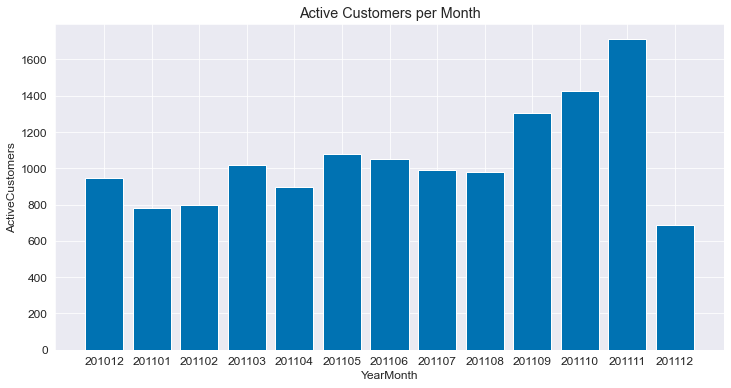

In [95]:
x2 = [a for a in range(len(MonthlyKPIs.YearMonth))]
plt.xlabel("YearMonth")
plt.ylabel("ActiveCustomers")
plt.title("Active Customers per Month")
plt.bar(x2, MonthlyKPIs.ActiveCustomers)
plt.xticks(x2, MonthlyKPIs.YearMonth);

# Quantity (Monthly Order Count)

In [96]:
MonthlyKPIs['MonthlyOrderCount'] = retail_pp.groupby('YearMonth')['Quantity'].sum().reset_index().Quantity
MonthlyKPIs

,YearMonth,Revenue,MonthlyGrowth,ActiveCustomers,MonthlyOrderCount
0,201012,554604.020,NaN,948,296362
1,201101,475074.380,-0.143399,783,269379
2,201102,436546.150,-0.081099,798,262833
3,201103,579964.610,0.328530,1020,344012
4,201104,426047.851,-0.265390,899,278585
5,201105,648251.080,0.521545,1079,367852
6,201106,608013.160,-0.062072,1051,356922
7,201107,574238.481,-0.055549,993,363418
8,201108,616368.000,0.073366,980,386612
9,201109,931440.372,0.511176,1302,537496


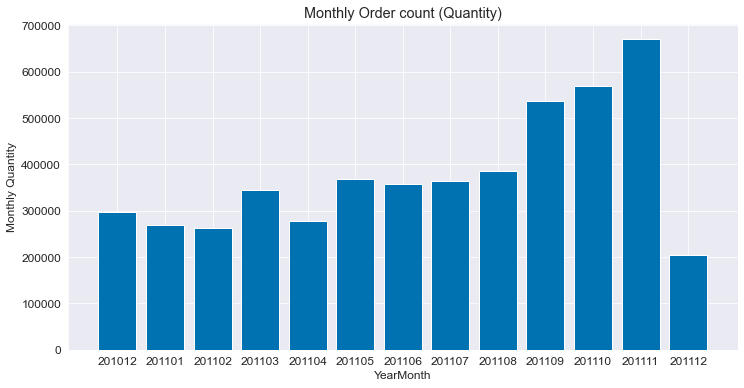

In [97]:
x3 = [a for a in range(len(MonthlyKPIs.YearMonth))]
plt.xlabel("YearMonth")
plt.ylabel("Monthly Quantity")
plt.title("Monthly Order count (Quantity)")
plt.bar(x3, MonthlyKPIs.MonthlyOrderCount)
plt.xticks(x3, MonthlyKPIs.YearMonth);

# Average Revenue per order

In [99]:
MonthlyKPIs['AverageMonthlyOrder'] = retail_pp.groupby('YearMonth')['Revenue'].mean().reset_index().Revenue
MonthlyKPIs

,YearMonth,Revenue,MonthlyGrowth,ActiveCustomers,MonthlyOrderCount,AverageMonthlyOrder
0,201012,554604.020,NaN,948,296362,20.655643
1,201101,475074.380,-0.143399,783,269379,21.681014
2,201102,436546.150,-0.081099,798,262833,21.438204
3,201103,579964.610,0.328530,1020,344012,20.845540
4,201104,426047.851,-0.265390,899,278585,18.365715
5,201105,648251.080,0.521545,1079,367852,22.424626
6,201106,608013.160,-0.062072,1051,356922,21.842691
7,201107,574238.481,-0.055549,993,363418,20.879881
8,201108,616368.000,0.073366,980,386612,22.282120
9,201109,931440.372,0.511176,1302,537496,22.817118


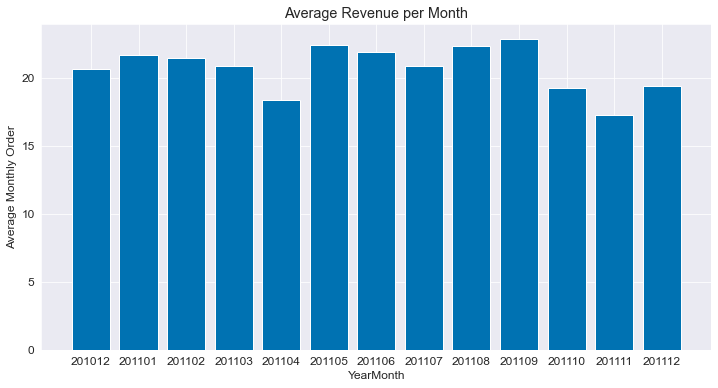

In [100]:
plt.xlabel("YearMonth")
plt.ylabel("Average Monthly Order")
plt.title("Average Revenue per Month")
plt.bar(x3, MonthlyKPIs.AverageMonthlyOrder)
plt.xticks(x3, MonthlyKPIs.YearMonth);

# Customer KPIs

New vs Old Customer

.  Define new feature to distinguish New from Existing Customers

# Monthly Retention Rate

.  Calculate monthly revenue per customer

.  Construct retention table per customer: monthly activity
    
.  Calculate:
    
        .  Retained customer count from previous month
        
        .  Total Customer count from this month

In [101]:
# Generate new dataframe based on CustomerID and its first purchase date
customer_fist_purchase = retail_pp.groupby('CustomerID').InvoiceDate.min().reset_index()
customer_fist_purchase.columns = ['CustomerID','FirstPurchaseDate']
customer_fist_purchase['FirstPurchaseYearMonth'] = customer_fist_purchase['FirstPurchaseDate'].map(lambda date: 100*date.year + date.month)

# Add first purchase date column to the new Customer Dataframe by merging with the original retail_pp
retail_ppp = pd.merge(retail_pp, customer_fist_purchase, on='CustomerID')
retail_ppp['Date'] = pd.to_datetime(retail_ppp.InvoiceDate.dt.date)
retail_ppp.set_index('Date', inplace=True)
retail_ppp.head()

# Create new column "User Type" and default it to "New" as its values. Assign "Existing" value if 
# User's "FirstPurchaseYearMonth" was before the selected "InvoiceYearMonth"
# Improvement: derive new or existing customers based on index.date :) 
retail_ppp['UserType'] = 'New'
retail_ppp.loc[retail_ppp['YearMonth']>retail_ppp['FirstPurchaseYearMonth'],'UserType'] = 'Existing'

In [102]:
# Calculate the Revenue per month for each user type
# customer.groupby(['YearMonth','UserType'])['Revenue'].sum().reset_index()

customer_kpis = pd.DataFrame(retail_ppp.groupby([retail_ppp.index.year,retail_ppp.index.month, retail_ppp.UserType])['Revenue'].sum())
customer_kpis.index.set_names(['Year', 'Month', 'UserType'], inplace = True)
customer_kpis

Revenue
Year Month UserType            
2010 12    New       554604.020
2011 1     Existing  271616.520
           New       203457.860
     2     Existing  287024.770
           New       149521.380
     3     Existing  390034.530
           New       189930.080
     4     Existing  306283.600
           New       119764.251
     5     Existing  532392.340
           New       115858.740
     6     Existing  515486.650
           New        92526.510
     7     Existing  508355.610
           New        65882.871
     8     Existing  538709.770
           New        77658.230
     9     Existing  778161.781
           New       153278.591
     10    Existing  819672.900
           New       154930.690
     11    Existing  998176.360
           New       134231.380
     12    Existing  315729.630
           New        26776.750

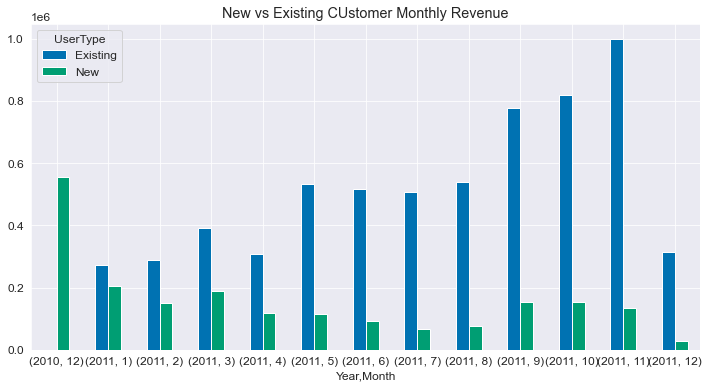

In [103]:
# Plot new vs existing customers
customer_kpis.unstack().plot.bar(y='Revenue', title='New vs Existing CUstomer Monthly Revenue', rot=0);

In [104]:
retail_ppp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth,Revenue,FirstPurchaseDate,FirstPurchaseYearMonth,UserType
Date,,,,,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,N,2010,12,201012,15.30,2010-12-01 08:26:00,201012,New
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,N,2010,12,201012,22.00,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34,2010-12-01 08:26:00,201012,New


# Product KPIs

In [108]:
# Create initial Product Dataframe based on each Product's revenue and sort products based on increasing revenue
productKPIs = pd.DataFrame(retail_pp.groupby('StockCode').Revenue.sum().sort_values().reset_index())
productKPIs.head()

,StockCode,Revenue
0,M,-58385.46
1,CRUK,-7933.43
2,D,-5696.22
3,22769,-87.80
4,79323W,-54.00


In [109]:
productKPIs.shape

(3684, 2)

In [111]:
# Get descriptions of Stock Codes to new DataFrame
group_by_objects = retail_pp.groupby('StockCode')
codes = []
descriptions = []

for index, data in group_by_objects:
    stock_code = data.values[0][1]
    stock_description = data.values[0][2]
    
    codes.append(stock_code)
    descriptions.append(stock_description)
    
lookup = pd.DataFrame(list(zip(codes, descriptions)), columns=['StockCode', 'Description'] )
lookup.head()

,StockCode,Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10125,MINI FUNKY DESIGN TAPES
4,10133,COLOURING PENCILS BROWN TUBE


In [112]:
lookup.shape

(3684, 2)

In [114]:
# Merge into new product dataframe
p_kpis = pd.merge(productKPIs, lookup, on='StockCode')
p_kpis.head()

,StockCode,Revenue,Description
0,M,-58385.46,Manual
1,CRUK,-7933.43,CRUK Commission
2,D,-5696.22,Discount
3,22769,-87.80,CHALKBOARD KITCHEN ORGANISER
4,79323W,-54.00,WHITE CHERRY LIGHTS


In [115]:
p_kpis.shape

(3684, 3)

# Product metrics Visualisations

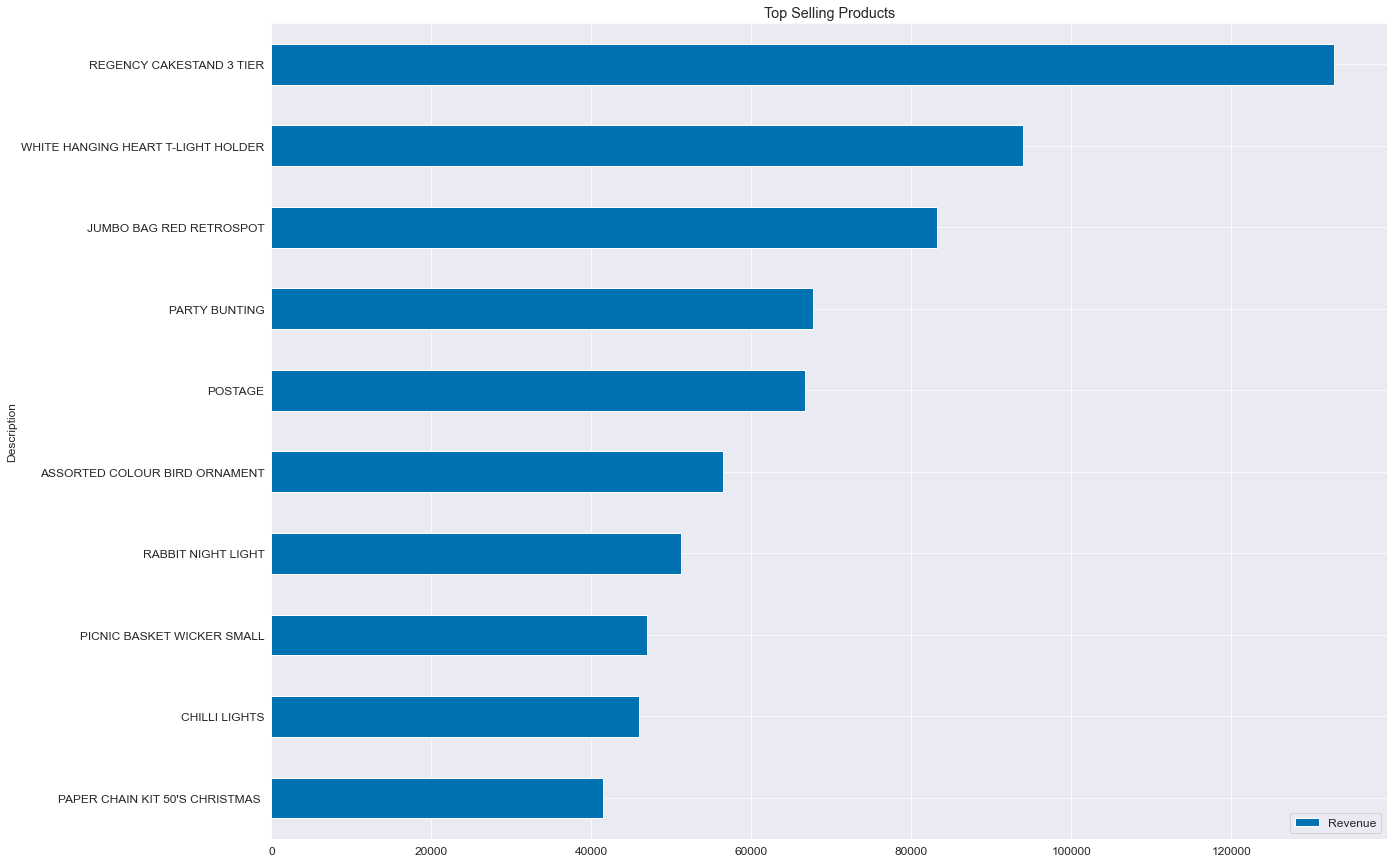

In [116]:
# Top 25 selling products
p_kpis.tail(10).plot.barh(x='Description', y='Revenue',figsize=(20,15), title = 'Top Selling Products' );

In [117]:
# Top 20 selling products (list)
p_kpis.tail(20)

,StockCode,Revenue,Description
3664,85099F,30195.71,JUMBO BAG STRAWBERRY
3665,22960,31658.47,JAM MAKING SET WITH JARS
3666,22720,32607.80,SET OF 3 CAKE TINS PANTRY DESIGN
3667,82484,34307.06,WOOD BLACK BOARD ANT WHITE FINISH
3668,23284,34312.60,DOORMAT KEEP CALM AND COME IN
3669,23298,35691.14,SPOTTY BUNTING
3670,22386,36473.01,JUMBO BAG PINK POLKADOT
3671,23203,36607.98,JUMBO BAG DOILEY PATTERNS
3672,22197,36859.88,SMALL POPCORN HOLDER
3673,21137,39009.38,BLACK RECORD COVER FRAME


# Product Processing - Remove negative values

When tried to show the lowest selling products, it appears that some of the product codes have valid transactions that refer to discounts, commissions or manual adjustments to the prices which are useful from an overal Revenue perspective but not from Product KPIs.

As such, these will be removed in order to visualise the lowest selling products

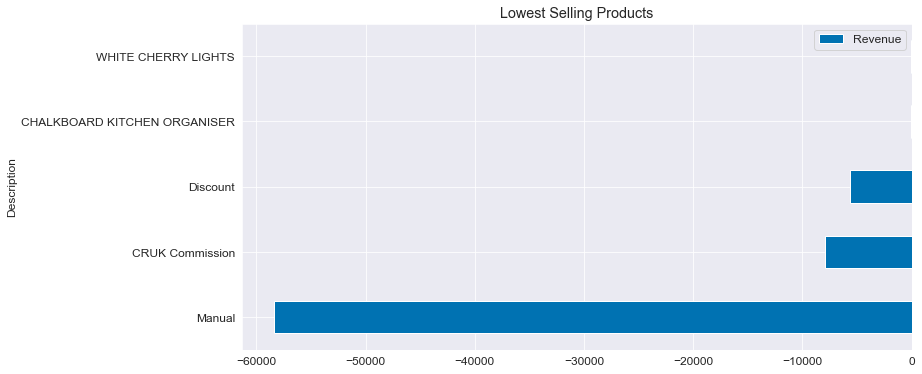

In [118]:
# Capturing the lowest selling products including the ones with negative prices that need to be removed for visualisation purposes
p_kpis.head().plot.barh(x='Description', y='Revenue', title = 'Lowest Selling Products' );

# Product Processing - Remove negative values

Some of the product codes seem to be valid transactions the refer to discounts, commissions or manual adjustments to the prices which are useful from an overal Revenue perspective but not from Product KPIs.

As such, these will be removed in order to identify the lowest selling products

In [119]:
p_kpis.shape

(3684, 3)

In [120]:
p_kpis.loc[p_kpis.Revenue>0].head()

,StockCode,Revenue,Description
41,PADS,0.003,PADS TO MATCH ALL CUSHIONS
42,84227,0.420,HEN HOUSE W CHICK IN NEST
43,85047,0.800,WHITE BEADED GARLAND STRING 20LIGHT
44,21268,0.840,VINTAGE BLUE TINSEL REEL
45,90104,0.850,PURPLE FRANGIPANI HAIRCLIP


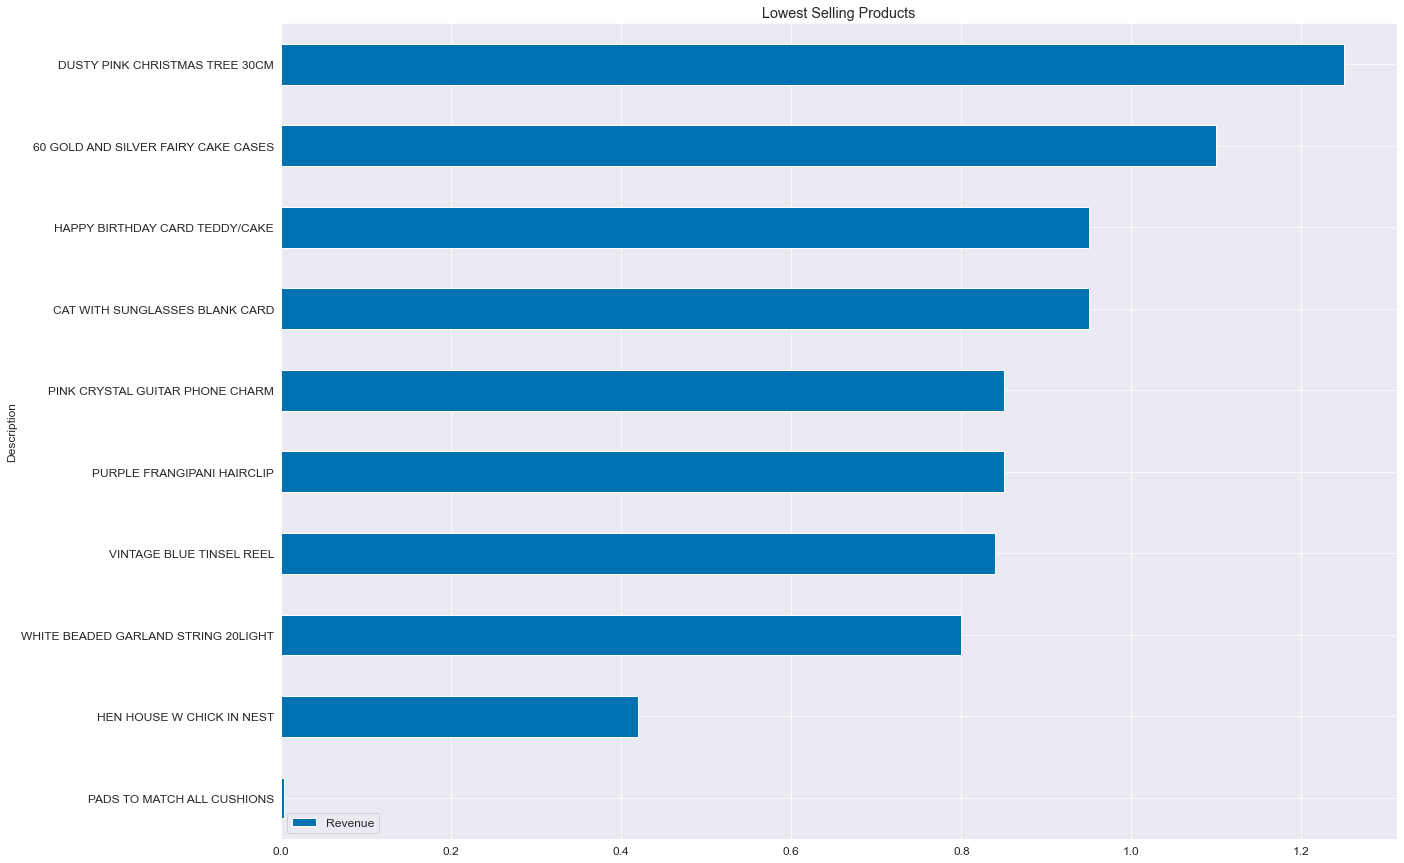

In [121]:
p_kpis.loc[p_kpis.Revenue>0].head(10).plot.barh(x='Description', y='Revenue', figsize=(20,15), title = 'Lowest Selling Products' );

# D. Modelling - Part 4 - RFM Modelling

In order to do Customer Segmentation, the RFM modelling technique will be used.

# RFM stands for Recency - Frequency - Monetary Value with the following definitions:

1. Recency - Given a current or specific date in the past, when was the last time that the customer made a transaction
2. Frequency - Given a specific time window, how many transactions did the customer do during that window
3. Monetary Value or Revenue - Given a specific window, how much did the customer spend

Based on the values above, one could construct various segments that classify the customers to:

# Low value Segment

R - Less active

F - Not very frequent

M - Low spend


# Mid value Segment

.R - Medium or inconsistent activity

.F - infrequent or frequent at specific times

.M - varied spending but overall in the mid of the scale


# High value Segment

. R - Very active

. F - Very frequent

. M - Great spending profile

# Approach

Going forward the approach for deriving customer segments would be:

. Calculate RFM scores individually and plot them to get an idea about their values and ranges

. Use K-Means clustering unsupervised learning algorithm to create these 3 clusters above

. Use techniques to optimise the number of clusters based on Silhouette and Inertia scores


# 4.1 Recency Score

In [122]:
# Generate new dataframe based on unique CustomerID to keep track of RFM scores
customer = pd.DataFrame(retail_pp['CustomerID'].unique())
customer.columns = ['CustomerID']

In [123]:
# Generate new data frame based on latest Invoice date from retail_ppp dataframe per Customer (groupby = CustomerID)
recency = retail_ppp.groupby('CustomerID').InvoiceDate.max().reset_index()
recency.columns = ['CustomerID','LastPurchaseDate']

# Set observation point as the last invoice date in the dataset
LastInvoiceDate = recency['LastPurchaseDate'].max()

# Generate Recency in days by subtracting the Last Purchase date for each customer from the Last Invoice Date
recency['Recency'] = (LastInvoiceDate - recency['LastPurchaseDate']).dt.days

In [124]:
# Consolidate to customer DataFrame
customer = pd.merge(customer, recency[['CustomerID','Recency']], on='CustomerID')
customer.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,329


In [125]:
# Review statistics around Recency score 
customer.describe()

,CustomerID,Recency
count,4372.000000,4372.000000
mean,15299.677722,91.047118
std,1722.390705,100.765435
min,12346.000000,0.000000
25%,13812.750000,16.000000
50%,15300.500000,49.000000
75%,16778.250000,142.000000
max,18287.000000,373.000000


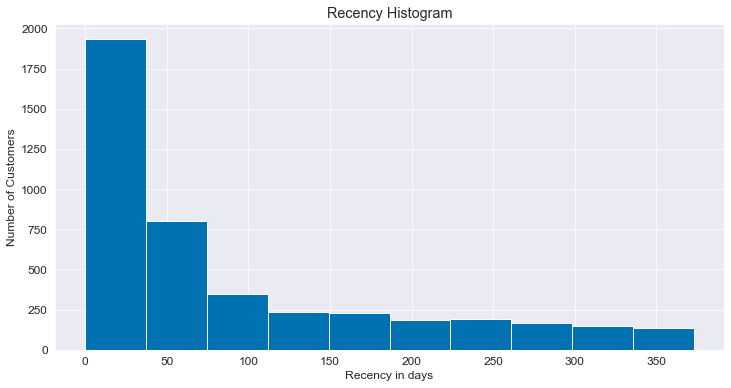

In [126]:
# Plot Recency
customer.Recency.plot.hist();
plt.xlabel("Recency in days")
plt.ylabel("Number of Customers")
plt.title("Recency Histogram");

# 4.2 Frequency Score

Frequency metric reflects the number of orders per Customer, so a simple count of the invoices grouped per Customer ID would do

In [127]:
# Count number of invoices per CustomerID and store in new frequency Dataframe
frequency = retail_ppp.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

# Consolidate Frequency to existing Customer DataFrame
customer = pd.merge(customer, frequency, on='CustomerID')

In [128]:
customer.head()

,CustomerID,Recency,Frequency
0,17850.0,301,312
1,13047.0,31,196
2,12583.0,2,251
3,13748.0,95,28
4,15100.0,329,6


In [129]:
customer.describe()

,CustomerID,Recency,Frequency
count,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294
std,1722.390705,100.765435,232.471608
min,12346.000000,0.000000,1.000000
25%,13812.750000,16.000000,17.000000
50%,15300.500000,49.000000,42.000000
75%,16778.250000,142.000000,102.000000
max,18287.000000,373.000000,7983.000000


In [130]:
customer.Frequency.shape

(4372,)

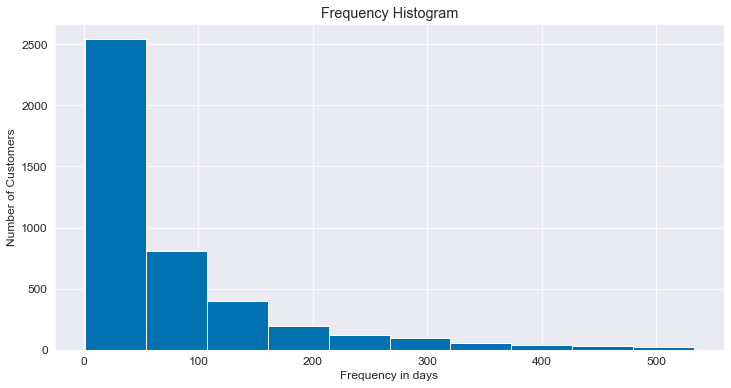

In [131]:
# Plot Frequency
# Frequency seems to have some outliers, with vey high frequency, but very few in numbers
# In order to plot effectively and not have a skewed diagram, we've sorted the frequencies
# and cropped the top 72 values in our diagram
customer.Frequency.sort_values().head(4300).plot.hist();
plt.xlabel("Frequency in days")
plt.ylabel("Number of Customers")
plt.title("Frequency Histogram");

# 4.3 Monetery Value Score (Revenue)

In [132]:
# Revenue per transaction has already been calculated as per KPIs section
# Grouping revenue per Customer ID
revenue = retail_ppp.groupby('CustomerID').Revenue.sum().reset_index()

# Consolidate Revenue to existing Customer DataFrame
customer = pd.merge(customer, revenue, on='CustomerID')
customer.head()

,CustomerID,Recency,Frequency,Revenue
0,17850.0,301,312,5288.63
1,13047.0,31,196,3079.10
2,12583.0,2,251,7187.34
3,13748.0,95,28,948.25
4,15100.0,329,6,635.10


In [133]:
customer.describe()

,CustomerID,Recency,Frequency,Revenue
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294,1898.459701
std,1722.390705,100.765435,232.471608,8219.345141
min,12346.000000,0.000000,1.000000,-4287.630000
25%,13812.750000,16.000000,17.000000,293.362500
50%,15300.500000,49.000000,42.000000,648.075000
75%,16778.250000,142.000000,102.000000,1611.725000
max,18287.000000,373.000000,7983.000000,279489.020000


In [134]:
customer.head()

,CustomerID,Recency,Frequency,Revenue
0,17850.0,301,312,5288.63
1,13047.0,31,196,3079.10
2,12583.0,2,251,7187.34
3,13748.0,95,28,948.25
4,15100.0,329,6,635.10


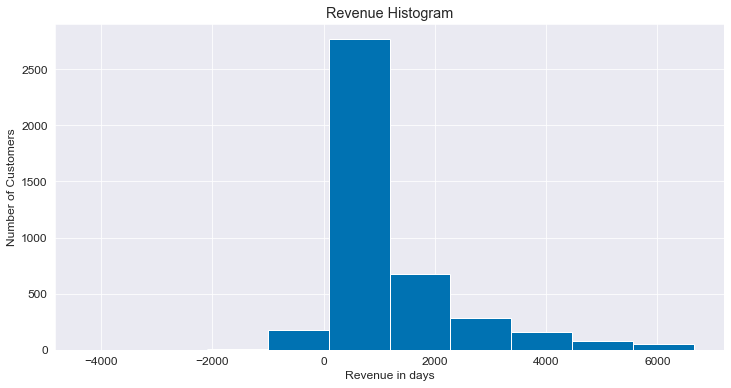

In [135]:
# Plot Revenue
customer.Revenue.sort_values().head(4200).plot.hist();
plt.xlabel("Revenue in days")
plt.ylabel("Number of Customers")
plt.title("Revenue Histogram");

Text(0, 0.5, 'Revenue')

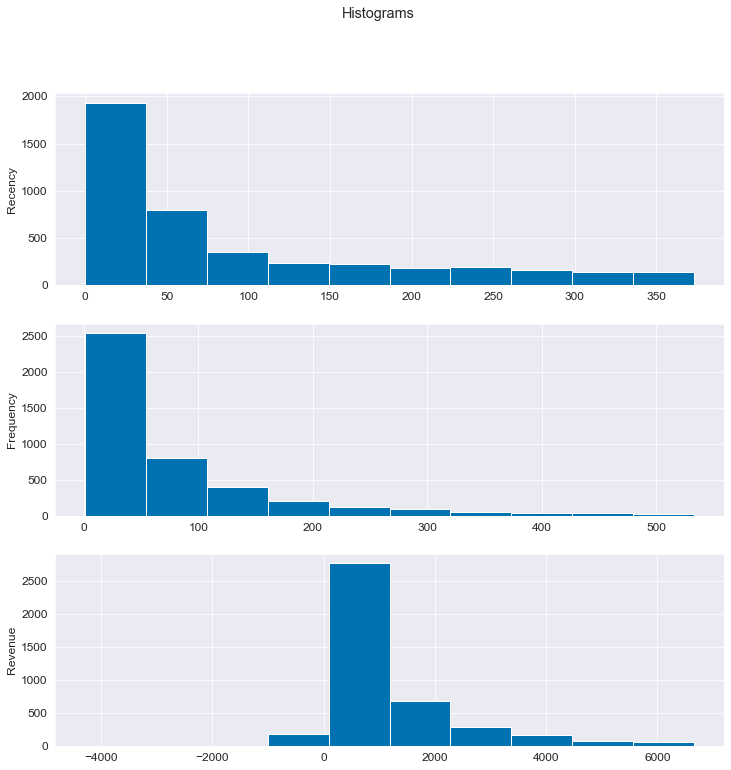

In [136]:
fig, (ax4, ax5, ax6) = plt.subplots(3)
fig.suptitle('Histograms')
customer.Recency.plot.hist(ax = ax4, figsize = (12,12));
customer.Frequency.sort_values().head(4300).plot.hist(ax = ax5);
customer.Revenue.sort_values().head(4200).plot.hist(ax = ax6);
ax4.set_ylabel('Recency')
ax5.set_ylabel('Frequency')
ax6.set_ylabel('Revenue')

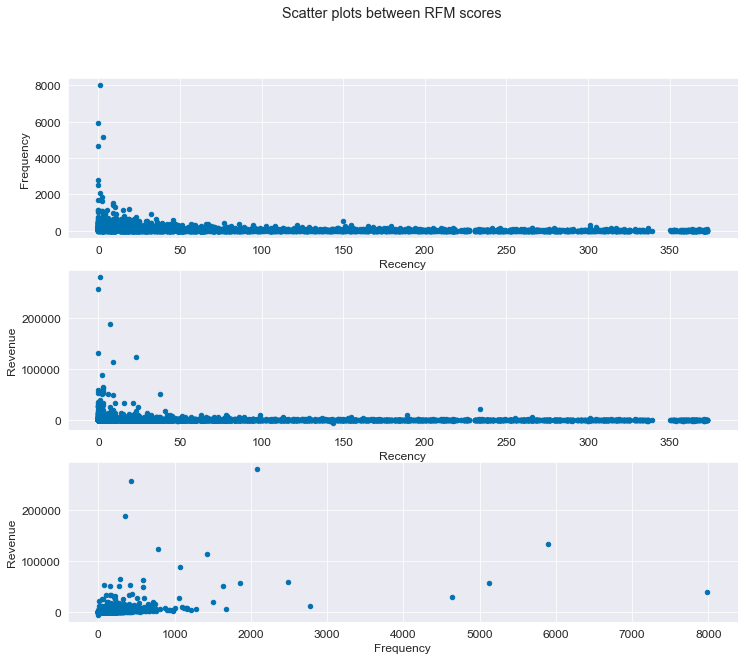

In [137]:
# Finally lets review the scatter plots between the different scores

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Scatter plots between RFM scores')
customer.plot.scatter(x = 'Recency', y = 'Frequency', ax = ax1, figsize = (12,10));
customer.plot.scatter(x = 'Recency', y = 'Revenue', ax = ax2);
customer.plot.scatter(x = 'Frequency', y = 'Revenue', ax = ax3);

# K-Means Clustering

In [138]:
# Creating input features variable
X = customer.loc[:, 'Recency':'Revenue']
X.head()

,Recency,Frequency,Revenue
0,301,312,5288.63
1,31,196,3079.10
2,2,251,7187.34
3,95,28,948.25
4,329,6,635.10


In [139]:
# Number of clusters (Configurable) - Initially we're attempting based on the 3 Segments (Low, Mid, High)
k=3

In [140]:
# Scaling input using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [143]:
# Run and train main K-means algorithm based on all input features
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, random_state=0)
model.fit(Xstd)

KMeans(n_clusters=3, random_state=0)

In [142]:
# Review output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

Assigned cluster labels: 
 [0 1 1 ... 1 1 1]


In [144]:
# Review Centroids of clusters
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[ 1.53076400e+00 -2.80810509e-01 -1.74427230e-01]
 [-5.17104330e-01  5.17752777e-02  6.86884206e-03]
 [-8.63957712e-01  1.18416391e+01  1.42137753e+01]]


In [145]:
centroids[:,0]

array([ 1.530764  , -0.51710433, -0.86395771])

In [146]:
# Append clusters to input features table
Xstd['clusters'] = cluster_labels
Xstd.head()

,Recency,Frequency,Revenue,clusters
0,2.083819,0.941929,0.412510,0
1,-0.595978,0.442886,0.143658,1
2,-0.883808,0.679501,0.643541,1
3,0.039233,-0.279865,-0.115620,1
4,2.361724,-0.374511,-0.153723,0


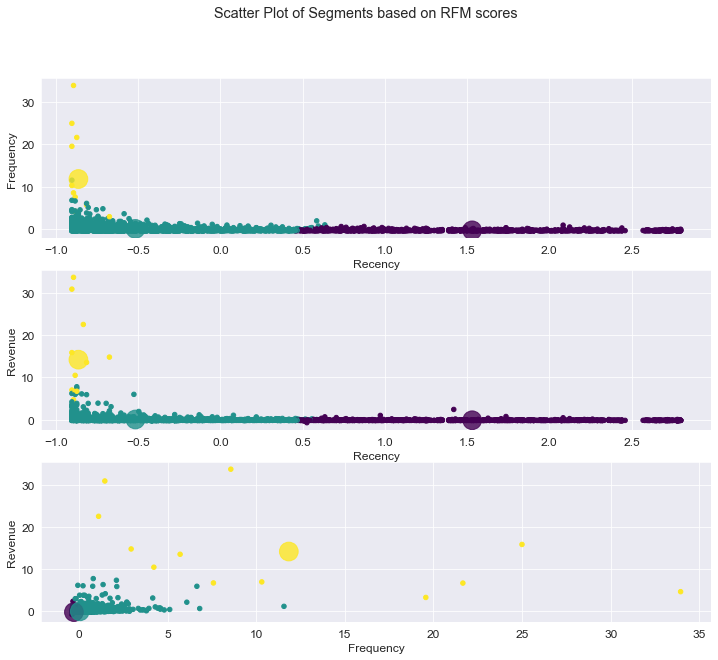

In [147]:
# Scatter plot of data coloured by cluster they belong to
fig, (ax4, ax5, ax6) = plt.subplots(3);
fig.suptitle('Scatter Plot of Segments based on RFM scores');

Xstd.plot.scatter(x = 'Recency', y = 'Frequency', c=Xstd['clusters'], colormap='viridis', ax=ax4, colorbar=False,figsize = (12,10));
ax4.scatter(centroids[:,0], centroids[:,1], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');

Xstd.plot.scatter(x = 'Recency', y = 'Revenue', c=Xstd['clusters'], colormap='viridis', ax=ax5, colorbar=False);
ax5.scatter(centroids[:,0], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');

Xstd.plot.scatter(x = 'Frequency', y = 'Revenue', c=Xstd['clusters'], colormap='viridis', ax=ax6, colorbar=False);
ax6.scatter(centroids[:,1], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');


# Evaluation Metrics - Silhouette and Inertia scores

In [148]:
from sklearn import metrics
metrics.silhouette_score(Xstd, cluster_labels, metric='euclidean')

0.6498453574598603

In [149]:
model.inertia_

5408.474380238328

In [153]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.Installing collected packages: scikit-plot



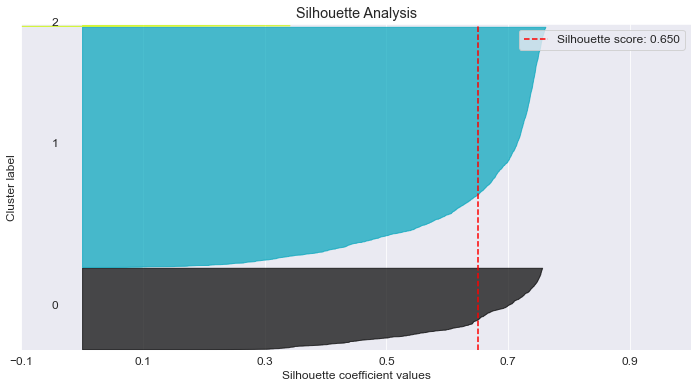

In [154]:
# Plotting Silhouette Score
from scikitplot.metrics import plot_silhouette
plot_silhouette(Xstd, cluster_labels);

# K-Means optimization

In [155]:
inertias = []
ss = []

for k in range(2,11):
    
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(Xstd)
    inertias.append(kmeans.inertia_)
    ss.append(metrics.silhouette_score(Xstd, kmeans.labels_, metric='euclidean'))

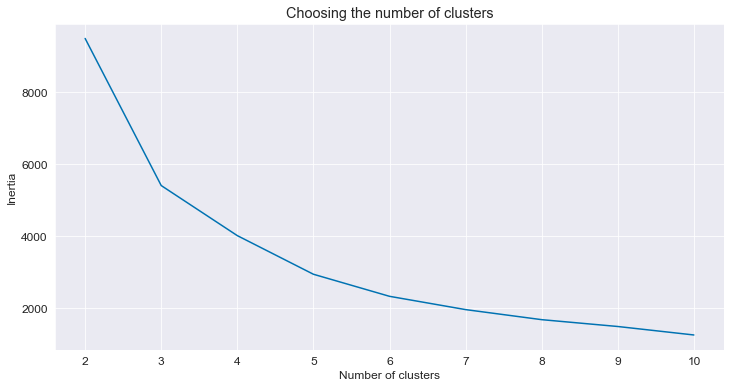

In [156]:
plt.plot(range(2, 11), inertias)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [157]:
# Based on Inertia graph the optimal K is 8 with the following Inertia value
min(inertias)

1255.3883122630775

In [158]:
inertias[8]

1255.3883122630775

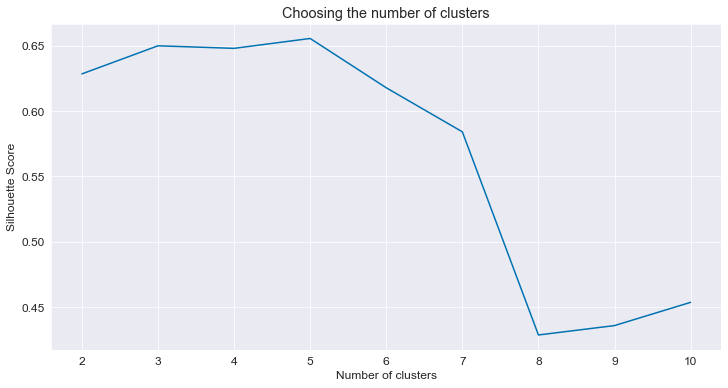

In [159]:
plt.plot(range(2, 11), ss)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [160]:
# Based on elbow graph the optimal K value is 8 with Silhouette score:
ss[8]

0.4536934305056901

# Customer Dataframe and Visualization

In [161]:
customer['Cluster'] = cluster_labels
customer.Cluster.unique()

array([0, 1, 2])

In [162]:
customer['Profile'] = cluster_labels
customer['Profile'].replace({0: "Low Value", 1: "Mid Value", 2: "High Value"}, inplace = True)

In [163]:
customer.head()

,CustomerID,Recency,Frequency,Revenue,Cluster,Profile
0,17850.0,301,312,5288.63,0,Low Value
1,13047.0,31,196,3079.10,1,Mid Value
2,12583.0,2,251,7187.34,1,Mid Value
3,13748.0,95,28,948.25,1,Mid Value
4,15100.0,329,6,635.10,0,Low Value


In [164]:
customer.Profile.describe(include=['O'])

count          4372
unique            3
top       Mid Value
freq           3257
Name: Profile, dtype: object

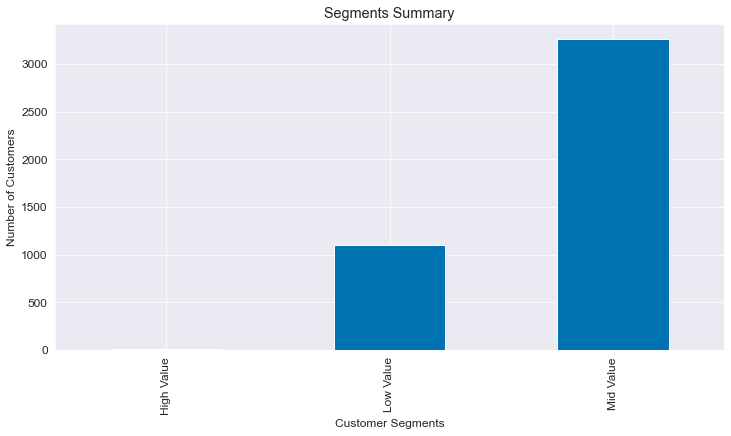

In [165]:
customer.groupby('Profile').Profile.count().plot.bar()
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Segments Summary");

# Summary and Conclusions

Initially, going by instinct, we started off with 3 segments, but computationally it proved that 8 segments were the optimal. We can combine these in order to be able to communicate the results to the business better and do the following grouping:

1.  Low Segment: 0-2
    
2.  Mid Segment: 3-5
    
3.  High Segment: 6-8
    

# Business Actions

Once we have a clear view of the Segments above, specific actions can be planned across the Business (Operations, Marketing,
                                                                                                      Product, etc...) to address any potential issues;
1.  High Value:
    
    > Improve Retention of these customers as they are the most valuable asset
    
2   Mid Value:
    
    > Increase Rention and Frequency and bring them closer to the brand and the product so eventually they become High Value
    
3   Low Value:  
    
    > Increase Frequency and understand if there are any potential issues around the product or service